## Eigen-portfolio construction using Principal Component Analysis (PCA)

### PCA via sklearn.decomposition using S&P 500 Index stock data

Welcome to your 2-nd assignment in Unsupervised Machine Learning in Finance.

In this assignment we look in-depth at model-free factor analysis using PCA. By model-free we mean that we do not rely on any factors such as value or momentum to decompose portfolio returns, but instead using Principal Component Analysis (PCA) to deduce structure of portfolio returns.

We work with S&P 500 index stock data. 

## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. You only need to write code between the ### START CODE HERE ### and ### END CODE HERE ### comments. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run Cell" (denoted by a play symbol) in the upper bar of the notebook. 

We will often specify "(≈ X lines of code)" in the comments to tell you about how much code you need to write. It is just a rough estimate, so don't feel bad if your code is longer or shorter.

In [1]:
import os
import os.path
import numpy as np
import datetime

import sys
sys.path.append("..")
import grading

try:
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    pass

try:
    import pandas as pd
    print("  pandas: %s"% pd.__version__)
except:
    print("Missing pandas package")

  pandas: 0.19.2


In [2]:
### ONLY FOR GRADING. DO NOT EDIT ### 
submissions=dict()
assignment_key="BBz-XobeEeegARIApDSa9g" 
all_parts=["nvDA9", "ykDlW", "rpYVm","oWy6l","MWWt7","3VyJD"]
### ONLY FOR GRADING. DO NOT EDIT ###

In [78]:
COURSERA_TOKEN = "vcmIaArsr0k7ObuL"  # the key provided to the Student under his/her email on submission page
COURSERA_EMAIL =  "bbalaji8@gmail.com"  # the email

In [4]:
# load dataset
asset_prices = pd.read_csv(os.getcwd() + '/data/spx_holdings_and_spx_closeprice.csv',
                     date_parser=lambda dt: pd.to_datetime(dt, format='%Y-%m-%d'),
                     index_col = 0).dropna()
n_stocks_show = 12
print('Asset prices shape', asset_prices.shape)
asset_prices.iloc[:, :n_stocks_show].head()

Asset prices shape (3493, 419)


,A,AA,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP
2000-01-27,46.1112,78.9443,3.9286,4.5485,13.7898,15.6719,48.0313,10.8844,39.5477,8.1250,32.9375,33.5625
2000-01-28,45.8585,77.8245,3.6295,4.5485,14.2653,14.3906,47.7500,10.7143,38.5627,7.7188,32.3125,33.0000
2000-01-31,44.5952,78.0345,3.7054,4.3968,14.5730,13.7656,46.7500,10.6576,37.3807,7.6406,32.5625,33.5000
2000-02-01,47.8377,80.7640,3.5804,4.5333,14.7128,13.9688,49.0000,10.8844,37.9717,7.9219,32.5625,33.6875
2000-02-02,51.5434,83.4934,3.5290,4.5788,14.7968,15.3281,48.1250,10.6576,35.9032,7.9688,32.5625,33.6250


In [5]:
print('Last column contains SPX index prices:')
asset_prices.iloc[:, -10:].head()

Last column contains SPX index prices:


,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2000-01-27,5.5918,86.6178,26.3983,11.3873,65.8677,22.1921,60.9705,20.7086,12.2457,1398.56
2000-01-28,5.4520,82.4218,27.4137,11.2230,60.3487,21.7558,62.3032,20.1183,12.0742,1360.16
2000-01-31,5.5499,86.3181,28.2444,11.0862,62.1484,22.0533,60.6373,19.5772,12.1722,1394.46
2000-02-01,5.4240,83.0212,28.7982,11.1683,67.3674,22.2120,60.4708,19.5772,12.5151,1409.28
2000-02-02,5.3541,81.5226,28.6136,11.1956,68.9271,22.6483,62.4698,19.5281,12.3192,1409.12


#### Part 1 (Asset Returns Calculation)
**Instructions:**

Calculate percent returns, also known as simple returns using asse_prices. assign the result to variable asset_returns. Keep only not-nan values in the resulting pandas.DataFrame

Calculate de-meaned returns and scale them by standard deviation $\sigma$. Assign result to normed_returns variable

We now compute stock returns and normalize stock returns data by subtracting the mean and dividing by standard diviation. This normalization is required by PCA.

In [14]:
#pd.get_option('display.width')

# df = asset_returns

# df_nulls = df.isnull().any()
# # df_nulls = df[df.isnull().any()] 
# # print(df_nulls)
# print(df_nulls.sum())

# df_nans = df.isnan().any()
# print(df_nans.sum())

# del df

In [15]:
def pdSummarize(df):
    pd.set_option('display.width', 115)
    
    if not (type(df) == type(pd.DataFrame())):
        df = pd.DataFrame(df)
        
    if not hasattr(df, 'BBILabel'):
        df.BBILabel = 'Please assign label to df.BBILabel'
        
    print("\npdSummarize: Summary of pd DataFrame: %s| shape: %s" % (df.BBILabel, str(df.shape)))
    indexRange = df.index.sort_values()
    indexRange = (indexRange[0], indexRange[-1])
    print("  Index: type:%s| range:%s" % (type(df.index), str(indexRange)))
    print(df.describe())
    print(df.iloc[:5, :10])
    print(df.iloc[-5:, -10:])
    
    df_nulls = df.isnull().any()
    df_nulls_nrows = df_nulls.sum()
    assert df_nulls_nrows == 0, "df contains %d rows with some null columns" % (df_nulls_nrows)

In [17]:
asset_returns = pd.DataFrame(data=np.zeros(shape=(len(asset_prices.index), asset_prices.shape[1])), 
                             columns=asset_prices.columns.values,
                             index=asset_prices.index)
normed_returns = asset_returns
### START CODE HERE ### (≈ 4 lines of code)
# normed_returns is pandas.DataFrame that should contain normalized returns


# asset_returns = asset_prices
asset_prices.BBILabel = 'Asset Prices'
pdSummarize(asset_prices)

# asset_prices_shift_1 = asset_prices.shift(1)
# asset_prices_shift_1.BBILabel = 'Asset Prices_shift_1'
# pdSummarize(asset_prices_shift_1)

# asset_returns = asset_prices - asset_prices_shift_1
# # asset_returns = (asset_prices - asset_prices.shift(1)) / asset_prices.shift(1)
# asset_returns.BBILabel = 'Asset Returns'
# pdSummarize(asset_returns)

asset_returns = (asset_prices / asset_prices.shift(1)) - 1
# asset_returns.BBILabel = 'Asset Returns'
# pdSummarize(asset_returns)

asset_returns = asset_returns.dropna()
asset_returns.BBILabel = 'Asset Returns nonNANs'
pdSummarize(asset_returns)

normed_returns = (asset_returns - asset_returns.mean()) / asset_returns.std()
normed_returns.BBILabel = 'Asset Returns nonNANs Normalized'
pdSummarize(normed_returns)

### END CODE HERE ###


normed_returns.iloc[-5:, -10:].head()


pdSummarize: Summary of pd DataFrame: Asset Prices| shape: (3493, 419)
  Index: type:<class 'pandas.tseries.index.DatetimeIndex'>| range:(Timestamp('2000-01-27 00:00:00'), Timestamp('2013-12-20 00:00:00'))
                 A           AA         AAPL          ABC          ABT         ADBE          ADI          ADM  \
count  3493.000000  3493.000000  3493.000000  3493.000000  3493.000000  3493.000000  3493.000000  3493.000000   
mean     23.847588    53.635247    23.214224    23.715043    23.812601    29.790258    38.389021    24.866709   
std      10.091903    24.547976    25.926701    12.916011     4.800847     9.660844    12.384053     9.949876   
min       7.310400    11.690500     0.937100     2.911000    13.258300     8.350000    16.100000     7.916700   
25%      17.174400    26.874700     1.899300    14.533200    20.363800    21.680000    31.070000    14.270000   
50%      23.018600    61.632600    12.230000    19.891900    23.231800    30.650000    36.960000    26.870000   
75

                  A            AA          AAPL           ABC           ABT          ADBE           ADI  \
count  3.492000e+03  3.492000e+03  3.492000e+03  3.492000e+03  3.492000e+03  3.492000e+03  3.492000e+03   
mean   2.819273e-17  5.524091e-18 -1.801092e-17 -1.706308e-16  3.266764e-17  4.549625e-17  4.602084e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -8.707278e+00 -5.806769e+00 -1.823250e+01 -5.981127e+00 -1.036584e+01 -9.696161e+00 -5.754141e+00   
25%   -4.155824e-01 -4.885188e-01 -4.880905e-01 -4.656557e-01 -5.070892e-01 -4.464119e-01 -4.761071e-01   
50%   -5.910630e-03 -7.025175e-04 -1.305918e-02 -1.517344e-02 -1.584281e-02 -1.754391e-02 -1.512513e-02   
75%    3.990154e-01  4.745599e-01  4.932621e-01  4.678674e-01  4.897228e-01  4.184681e-01  4.074843e-01   
max    1.514007e+01  8.393860e+00  4.830433e+00  9.768684e+00  7.960741e+00  7.760688e+00  6.019731e+00   

                ADM           ADP   

,STJ,SVU,SWY,TEG,TER,TGNA,THC,X,MAR.1,SPX
2013-12-16,0.852722,0.965219,-1.168885,0.884751,0.095865,0.656639,0.180014,-0.238498,0.465047,0.467931
2013-12-17,0.275173,0.517307,-0.086106,-0.306213,0.589689,-0.118610,-0.549523,0.025268,-0.260013,-0.247921
2013-12-18,0.864485,0.509435,0.600714,1.210605,-0.190024,0.925461,0.756998,0.058428,0.952458,1.252703
2013-12-19,0.210069,0.399574,-0.100159,-0.757419,-0.208023,0.304913,-0.772205,1.544228,-0.167775,-0.056358
2013-12-20,0.827306,0.748420,0.372443,1.048113,0.264046,0.436874,0.320641,-0.740854,0.373717,0.353859


In [18]:
### GRADED PART (DO NOT EDIT) ###
part_1=list(normed_returns.iloc[0,: 100].as_matrix().squeeze())
try:
    part1 = " ".join(map(repr, part_1))
except TypeError:
    part1 = repr(part_1)
submissions[all_parts[0]]=part1
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:1],all_parts,submissions)
normed_returns.iloc[0,: 100].as_matrix().squeeze()
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([-0.19005437, -0.51371017, -2.71470869, -0.04977943,  2.18293305,
       -2.68413088, -0.21246093, -0.76699639, -1.5407309 , -1.80394666,
       -1.37299129, -0.99416907,  0.16136183,  0.72980366,  0.63485621,
       -0.72131907, -0.01302927, -0.80797756,  0.39923062, -0.75893259,
       -1.43444651, -1.12783867, -1.29385343, -0.44802859, -2.13973399,
        0.58949813, -0.87826364,  0.31428572, -1.08060243, -0.31367868,
        0.11819333, -1.8686777 , -1.87275168, -0.22608376, -0.04189121,
       -0.02136145, -0.60458719, -1.43087396, -1.16679677, -1.65594274,
       -0.50493241, -1.5196492 , -0.36359946, -0.58859176, -0.73289901,
        0.87654672, -3.12410596, -1.33977245, -1.33866029, -0.53051976,
       -1.28309222, -2.2171311 ,  1.75785074,  0.22815795, -0.48093428,
       -0.21160476, -1.39163378, -1.8907977 , -1.26523275, -0.90790361,
        1.20007622, -1.13783598, -1.06735573, -1.49029484,  1.65191927,
       -0.94841616,  3.36936561, -0.82344479,  1.76591258,  0.04

In [19]:
train_end = datetime.datetime(2012, 3, 26) 

df_train = None
df_test = None
df_raw_train = None
df_raw_test = None

df_train = normed_returns[normed_returns.index <= train_end].copy()
df_test = normed_returns[normed_returns.index > train_end].copy()

df_raw_train = asset_returns[asset_returns.index <= train_end].copy()
df_raw_test = asset_returns[asset_returns.index > train_end].copy()

print('Train dataset:', df_train.shape)
print('Test dataset:', df_test.shape)

Train dataset: (3055, 419)
Test dataset: (437, 419)


In [20]:
#pdSummarize(asset_returns)

Now we compute PCA using all available data. Once we do have PCA computed we fix variance explained at some number and see what is the smallest number of components needed to explain this variance.

#### Part 2 (PCA fitting)
**Instructions:**
- Calculate covariance matrix using training data set, i.e. **df_train** for all assets.  Assign results to **cov_matrix**.
- Calculate covariance matrix using training data set, i.e. **df_raw_train** for all assets.  Assign results to **cov_matrix_raw**.
- Use scikit-learn PCA to fit PCA model to **cov_matrix**. Assign fitted model to **pca**

In [21]:
#print(stock_tickers)
#print(len(stock_tickers))

In [22]:
import sklearn.decomposition
import seaborn as sns

stock_tickers = normed_returns.columns.values[:-1]
assert 'SPX' not in stock_tickers, "By accident included SPX index"

n_tickers = len(stock_tickers)
pca = None
cov_matrix = pd.DataFrame(data=np.ones(shape=(n_tickers, n_tickers)), columns=stock_tickers)
cov_matrix_raw = cov_matrix

if df_train is not None and df_raw_train is not None:
    stock_tickers = asset_returns.columns.values[:-1]
    assert 'SPX' not in stock_tickers, "By accident included SPX index"

    ### START CODE HERE ### (≈ 2-3 lines of code)
    
    # computing PCA on S&P 500 stocks
    cov_matrix = df_train[stock_tickers].cov()
    cov_matrix_raw = df_raw_train[stock_tickers].cov()
    pca = sklearn.decomposition.PCA(random_state = 42
            #, n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0
            #, iterated_power=’auto’
             )
    pca.fit(cov_matrix)
    print("PCA fit of cov_matrix completed")

    # not normed covariance matrix
    
    ### END CODE HERE ###
    
    cov_raw_df = pd.DataFrame({'Variance': np.diag(cov_matrix_raw)}, index=stock_tickers)    
    # cumulative variance explained
    var_threshold = 0.8
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  # +1 due to zero based-arrays
    print('%d components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

PCA fit of cov_matrix completed
4 components explain 80.00% of variance


In [23]:
### GRADED PART (DO NOT EDIT) ###
part_2 = np.diag(cov_matrix[: 100])
try:
    part2 = " ".join(map(repr, part_2))
except TypeError:
    part2 = repr(part_2)
submissions[all_parts[1]]=part2
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:2],all_parts,submissions)
### GRADED PART (DO NOT EDIT) ###
np.diag(cov_matrix[: 100])

Submission successful, please check on the coursera grader page for the status


array([ 1.10446611,  1.09424087,  1.08190134,  1.10517006,  1.06941473,
        1.10597862,  1.11869287,  1.0839399 ,  1.09803084,  1.06590728,
        1.07798702,  1.107393  ,  1.12418337,  1.10412774,  1.07721126,
        1.11952577,  1.11507312,  1.10687469,  1.04827028,  1.10800935,
        1.10480045,  1.04297489,  1.07466613,  1.12510255,  1.10831513,
        1.09118222,  1.08418296,  1.02668336,  1.09808835,  1.08506552,
        1.08022595,  1.08116796,  1.09591114,  0.99807688,  1.11068716,
        1.01433366,  1.10360906,  1.06598755,  1.11003861,  1.0879927 ,
        1.08236593,  1.093903  ,  1.08489115,  1.1050359 ,  0.99850151,
        1.08347058,  1.1019318 ,  1.08932552,  1.08876911,  1.09560839,
        1.1027858 ,  1.09150807,  1.07067427,  1.1119615 ,  1.07304668,
        1.10625388,  1.10454709,  1.11531806,  1.06707655,  1.08925028,
        1.07207857,  1.08151718,  1.11539438,  1.09563297,  1.09915349,
        1.10098573,  1.09770417,  1.05315411,  1.08235287,  1.10

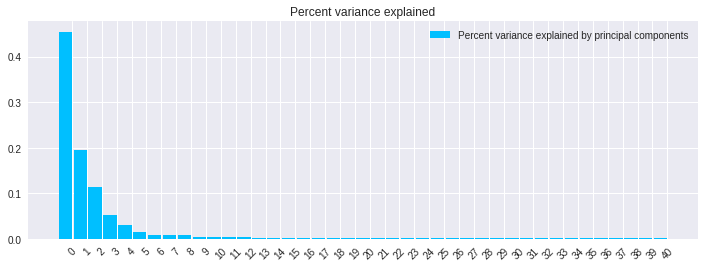

In [24]:
if pca is not None:
    bar_width = 0.9
    n_asset = int((1 / 10) * normed_returns.shape[1])
    x_indx = np.arange(n_asset)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    # Eigenvalues are measured as percentage of explained variance.
    rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width, color='deepskyblue')
    ax.set_xticks(x_indx + bar_width / 2)
    ax.set_xticklabels(list(range(n_asset)), rotation=45)
    ax.set_title('Percent variance explained')
    ax.legend((rects[0],), ('Percent variance explained by principal components',))

In [25]:
if pca is not None:
    projected = pca.fit_transform(cov_matrix)

In [26]:
pdSummarize(df_train[stock_tickers])


pdSummarize: Summary of pd DataFrame: Please assign label to df.BBILabel| shape: (3055, 418)
  Index: type:<class 'pandas.tseries.index.DatetimeIndex'>| range:(Timestamp('2000-01-28 00:00:00'), Timestamp('2012-03-26 00:00:00'))
                 A           AA         AAPL          ABC          ABT         ADBE          ADI          ADM  \
count  3055.000000  3055.000000  3055.000000  3055.000000  3055.000000  3055.000000  3055.000000  3055.000000   
mean     -0.001037    -0.000243     0.006733    -0.002758    -0.002254    -0.002367    -0.000541    -0.001112   
std       1.050936     1.046060     1.040145     1.051271     1.034125     1.051655     1.057683     1.041124   
min      -8.707278    -5.806769   -18.232496    -5.981127   -10.365839    -9.696161    -5.754141    -7.973071   
25%      -0.450808    -0.513379    -0.514858    -0.500276    -0.532684    -0.486342    -0.519900    -0.527245   
50%      -0.004474    -0.000703    -0.007843    -0.026341    -0.026345    -0.017581    -0.015

In [27]:
# cov_matrix.shape
pdSummarize(cov_matrix)


pdSummarize: Summary of pd DataFrame: Please assign label to df.BBILabel| shape: (418, 418)
  Index: type:<class 'pandas.indexes.base.Index'>| range:('1255459D', 'ZION')
                A          AA        AAPL         ABC         ABT        ADBE         ADI         ADM  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.336093    0.448156    0.294524    0.270195    0.267177    0.346349    0.339482    0.332757   
std      0.098692    0.108102    0.091253    0.068561    0.083271    0.099548    0.131731    0.081843   
min      0.081936    0.210236    0.064261    0.069017    0.079413    0.052192    0.012281    0.155344   
25%      0.280090    0.367303    0.235803    0.233169    0.219119    0.282945    0.257772    0.281830   
50%      0.331849    0.438188    0.288884    0.267583    0.266637    0.335854    0.322360    0.332567   
75%      0.390278    0.528103    0.338030    0.302285    0.313551    0.398079    0.394752    0

In [28]:
pca.explained_variance_ratio_

array([  4.54758084e-01,   1.95357534e-01,   1.14629265e-01,
         5.26249742e-02,   3.02302222e-02,   1.52673381e-02,
         8.88275484e-03,   8.17837942e-03,   7.31957573e-03,
         3.99232185e-03,   3.75624485e-03,   3.27831655e-03,
         3.05291703e-03,   2.37953125e-03,   2.24966447e-03,
         2.09392550e-03,   1.83495456e-03,   1.73714967e-03,
         1.67990293e-03,   1.60131298e-03,   1.58431481e-03,
         1.44593427e-03,   1.35590422e-03,   1.30688800e-03,
         1.26081980e-03,   1.23248790e-03,   1.21633966e-03,
         1.17221052e-03,   1.14365151e-03,   1.09641698e-03,
         1.03074856e-03,   1.01324707e-03,   1.00145585e-03,
         9.77834829e-04,   9.53300282e-04,   9.11141269e-04,
         9.07336248e-04,   8.89964171e-04,   8.49964890e-04,
         8.29785908e-04,   8.12485803e-04,   8.06946136e-04,
         8.02152188e-04,   7.81941685e-04,   7.62113744e-04,
         7.52200847e-04,   7.42508260e-04,   7.17213129e-04,
         7.10082460e-04,

In [29]:
#pca.components_.shape
#pdSummarize(pca.components_)

In [30]:
#type(pd.DataFrame())

In [31]:
pdSummarize(projected)


pdSummarize: Summary of pd DataFrame: Please assign label to df.BBILabel| shape: (418, 418)
  Index: type:<class 'pandas.indexes.range.RangeIndex'>| range:(0, 417)
                0             1             2             3             4             5             6    \
count  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02  4.180000e+02   
mean  -3.399726e-16  1.367859e-16 -2.707829e-16  1.554113e-16 -2.138109e-16 -2.231070e-17 -2.370512e-17   
std    1.397946e+00  9.162524e-01  7.018556e-01  4.755498e-01  3.604298e-01  2.561425e-01  1.953772e-01   
min   -3.165104e+00 -1.916218e+00 -1.194487e+00 -1.060468e+00 -7.045434e-01 -5.501569e-01 -4.375195e-01   
25%   -1.140890e+00 -4.668201e-01 -5.055369e-01 -3.207288e-01 -2.719917e-01 -1.564121e-01 -1.409270e-01   
50%    1.389526e-02  2.450680e-02 -1.413048e-01 -3.057598e-02 -8.754137e-02  8.353074e-03 -2.320344e-05   
75%    1.032309e+00  5.160031e-01  4.096097e-01  2.819676e-01  2.924451e-01  1.591943e

#### Part 3 (Eigen-portfolios construction)

**Instructions:**

We now look a the first two eigen portfolios. We use definition of eigen portfolios as provided by Avellaneda 
http://math.nyu.edu/faculty/avellane/AvellanedaLeeStatArb20090616.pdf

Following Avellaneda we define eigen portfolio weights as:
$$Q_i^{(j)} = \frac{v_i^{(j)}}{\sigma_i}$$

where $j$ is the index of eigen portfolio and $v_i$ is the i-th element of j-th eigen vector.

In the code the pca.components_ are the Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

**Hint:** do not forget to normalize portfolio wieghts such they sum up to 1.

Assign **pc_w** to be weights of the first eigen portfolio.

Sum of weights of first eigen-portfolio: 100.00


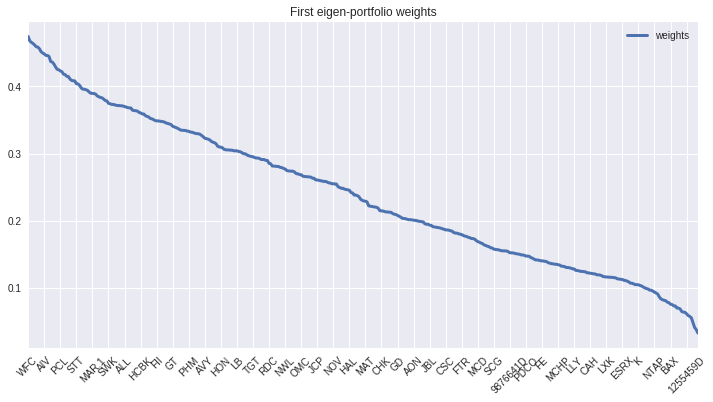

In [32]:
# the first two eigen-portfolio weights# the fi 
# first component
# get the Principal components
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    ### START CODE HERE ### (≈ 1-2 lines of code)
    # normalized to 1 
    # ***** Use the COLUMNS in the pcs matrix to get the weights for the eigenportfolios, 
    # although the principal components are stored in rows. (For parts 3 and 4 you can use either rows or columns).
    pc_w = pcs[0, :] / np.sum(pcs[0, :])
    
    ### END CODE HERE ###
    
    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights', 
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

In [33]:
### GRADED PART (DO NOT EDIT) ###
part_3 = list(eigen_prtf1.squeeze().values)
try:
    part3 = " ".join(map(repr, part_3))
except TypeError:
    part3 = repr(part_3)
submissions[all_parts[2]]=part3
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:3],all_parts,submissions)
eigen_prtf1.squeeze().values
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([ 0.47468423,  0.46792256,  0.46582859,  0.46409832,  0.46198185,
        0.4592216 ,  0.458831  ,  0.45625197,  0.45192491,  0.45003301,
        0.44861431,  0.44635401,  0.44622969,  0.44474862,  0.43727119,
        0.43642191,  0.43359854,  0.42928871,  0.425686  ,  0.42498937,
        0.42322574,  0.42200413,  0.41834441,  0.41775051,  0.4151422 ,
        0.41487592,  0.41115746,  0.40910199,  0.40856054,  0.40838443,
        0.40413899,  0.40379658,  0.40174295,  0.39791501,  0.3959889 ,
        0.39592681,  0.39515082,  0.39412325,  0.39158191,  0.38995266,
        0.38972076,  0.38942332,  0.38859578,  0.38587384,  0.38462409,
        0.38364827,  0.38301526,  0.38120255,  0.37904626,  0.37852305,
        0.37484083,  0.37422705,  0.37328098,  0.37318969,  0.37254937,
        0.37181577,  0.3715313 ,  0.37145626,  0.37118977,  0.37087543,
        0.37006206,  0.36935851,  0.36847054,  0.36807988,  0.36787886,
        0.36451816,  0.36416989,  0.36371064,  0.36335271,  0.36

We sort the first two eigen portfolio weights and plot the results.

Sum of weights of second eigen-portfolio: 100.00


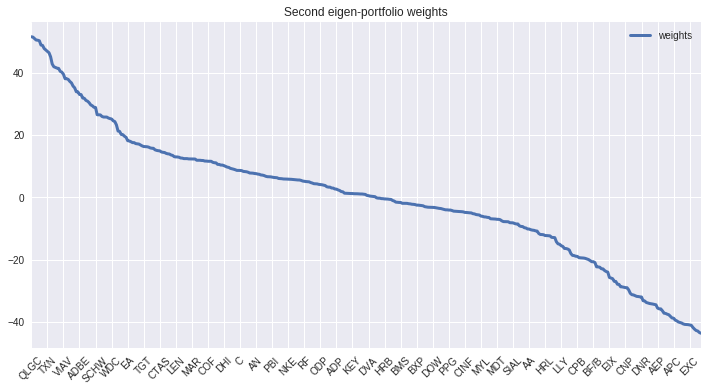

In [34]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_
    
    ### START CODE HERE ### (≈ 1-2 lines of code)
    # normalized to 1 
    # ***** Use the COLUMNS in the pcs matrix to get the weights for the eigenportfolios, 
    # although the principal components are stored in rows. (For parts 3 and 4 you can use either rows or columns).    
    pc_w = pcs[1, :] / np.sum(pcs[1, :])
    
    ### END CODE HERE ###

    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

In [35]:
### GRADED PART (DO NOT EDIT) ###
part_4 = list(eigen_prtf2.as_matrix().squeeze())
try:
    part4 = " ".join(map(repr, part_4))
except TypeError:
    part4 = repr(part_4)
submissions[all_parts[3]]=part4
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:4],all_parts,submissions)
eigen_prtf2.as_matrix().squeeze()
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([ 51.65986292,  51.53724502,  51.05317834,  50.59562408,
        50.53984311,  50.36010995,  48.9921189 ,  48.86058099,
        47.87521728,  47.39707654,  46.95374455,  46.5194061 ,
        45.23102635,  42.90497323,  42.01928917,  41.7883494 ,
        41.56515762,  41.46678784,  40.53669466,  40.27307481,
        39.59775069,  38.17070098,  38.1600556 ,  37.92807469,
        37.27514895,  36.81596065,  35.79434608,  35.23133829,
        33.97846128,  33.92850407,  33.10383768,  33.06116953,
        31.95733055,  31.86067795,  31.20140274,  30.94235672,
        30.45678381,  29.74194987,  29.46815708,  28.98249509,
        28.9101015 ,  26.58399759,  26.53961919,  26.52960206,
        26.02613154,  25.84455304,  25.84378206,  25.83094987,
        25.5186511 ,  25.33800869,  25.2008677 ,  24.62931676,
        24.37609232,  23.30721302,  21.34393834,  21.2026936 ,
        20.24542147,  20.17374453,  19.66415909,  19.31783218,
        18.24905957,  18.13796589,  17.91072006,  17.61

#### Part 4 (Compute performance of several eigen portfolios)

**Instructions:**
- Implement sharpe_ratio() function. The function takes ts_returns argument of type pd.Series and returns a tuple of annualized return, annualized vol, and annualized sharpe ratio, where sharpe ratio is defined as annualized return divided by annualized volatility 
- find portfolio (an index into sharpe_metric) that has the highest sharpe ratio

In [72]:
from scipy import stats as scipy_stats

def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio, 
                    where sharpe ratio is defined as annualized return divided by annualized volatility 
                    
    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio
    
    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """
    
    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.
    
    ### START CODE HERE ### (≈ 4-5 lines of code)
    
    # https://www.coursera.org/learn/fundamentals-machine-learning-in-finance/discussions/weeks/2/threads/iF-Qk5nYEeiHaQooPC_NRA
    # Here are some things you need to know if you want to pass part 5:

    #1) Use the COLUMNS in the pcs matrix to get the weights for the eigenportfolios, 
    # although the principal components are stored in rows. (For parts 3 and 4 you can use either rows or columns).

    # 2) Calculate annualized returns in the function sharpe_ratio() using the GEOMETRIC MEAN of the daily returns 
    # ts_returns.

    # 3) You will get NaN's in the results array (most likely for 3 eigenportfolios). 
    # Therefore, before you submit part 5, do results.dropna(inplace=True). 
    # This will reduce the number of Sharpe ratios submitted to the grader from 120 to 117.

    # If you want to read the detailed discussion that led up to these insights:
    # https://www.coursera.org/learn/fundamentals-machine-learning-in-finance/discussions/all/threads/60PTYG_jEeieDw7iscz5Kg
    
    ts_annual_returns = ((ts_returns + 1.0) ** periods_per_year) - 1.0
    
    annualized_return = ts_returns.mean() * periods_per_year
#     print("sharpe_ratio fn: annualized return: daily arithmetic mean times periods_per_year: %f" % (annualized_return))
#     annualized_return = scipy_stats.gmean(ts_returns)

#     annualized_return = ((np.cumprod(ts_returns + 1.0)[-1] - 1.0) ** (periods_per_year / ts_returns.shape[0])) - 1.0
#     annualized_return = (((np.cumprod(ts_returns / 100.0 + 1.0)[-1]) ** 
#                          (ts_returns.shape[0] * 1.0 / periods_per_year)) - 1.0) * 100.0
#     annualized_return = ((np.cumprod(ts_returns + 1.0)[-1]) ** (periods_per_year * 1.0 / ts_returns.shape[0])) - 1.0    
    
    annualized_return = (np.prod(ts_returns + 1.0) ** (periods_per_year * 1.0 / ts_returns.shape[0])) - 1.0
#     print("sharpe_ratio fn: annualized return: daily np.prod: %f" % (annualized_return))
    
#     annualized_return = (1+total_return)^(periods_per_year/total_days) - 1

#     annualized_return = ts_annual_returns.mean() * 100.0
#     print("sharpe_ratio fn: annualized return: annual arithmetic mean: %f" % (annualized_return))

#     annualized_return = scipy_stats.gmean(ts_annual_returns)
#     print("sharpe_ratio fn: annualized return: annual geometric mean: %f" % (annualized_return))

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = 1.0 * annualized_return / annualized_vol

    ### END CODE HERE ###
    
    return annualized_return, annualized_vol, annualized_sharpe

We compute the annualized return, volatility, and Sharpe ratio of the first two eigen portfolios.


pdSummarize: Summary of pd DataFrame: Please assign label to df.BBILabel| shape: (437, 1)
  Index: type:<class 'pandas.tseries.index.DatetimeIndex'>| range:(Timestamp('2012-03-27 00:00:00'), Timestamp('2013-12-20 00:00:00'))
                0
count  437.000000
mean     0.000709
std      0.009047
min     -0.031888
25%     -0.004633
50%      0.000992
75%      0.006372
max      0.028981
                   0
2012-03-27 -0.003551
2012-03-28 -0.007512
2012-03-29 -0.002515
2012-03-30  0.003237
2012-04-02  0.007932
                   0
2013-12-16  0.007842
2013-12-17 -0.002135
2013-12-18  0.015608
2013-12-19 -0.000073
2013-12-20  0.006654
First eigen-portfolio:
Return = 18.33%
Volatility = 14.36%
Sharpe = 1.28


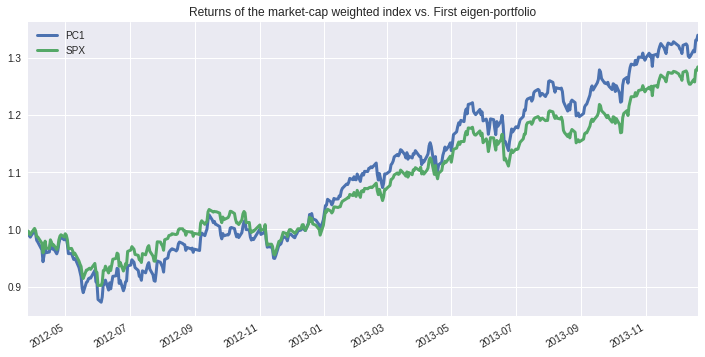

In [73]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    
    # BBI begin
#     print("eigen_prtf1_returns: shape:%s" % (str(eigen_prtf1_returns.shape)))
#     print("  values:"); print(eigen_prtf1_returns)
    eigen_prtf1_returns.BBIlabel = 'eigen_prtf1_returns'
    pdSummarize(eigen_prtf1_returns)
    # BBI end
    
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)

In [74]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = -97.25%
Volatility = 292.92%
Sharpe = -0.33


We repeat the exercise of computing Sharpe ratio for the first N portfolios and select portfolio with the highest postive Sharpe ratio.

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in double_scalars


Eigen portfolio #42 with the highest Sharpe. Return 61.14%, vol = 22.80%, Sharpe = 2.68


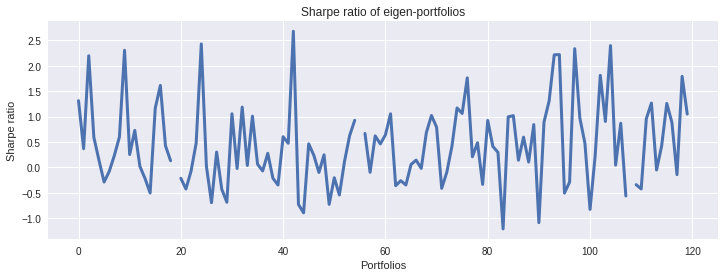

In [75]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio
    
if pca is not None:
    pcs = pca.components_
    for ix in range(n_portfolios):
        
        ### START CODE HERE ### (≈ 4-5 lines of code)
    
        # ***** Use the COLUMNS in the pcs matrix to get the weights for the eigenportfolios, 
        # although the principal components are stored in rows. (For parts 3 and 4 you can use either rows or columns).    
        pc_w = pcs[:, ix] / np.sum(pcs[:, ix])
    
        eigen_prtf_ix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtf_ix.sort_values(by=['weights'], ascending=False, inplace=True)
        #print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
#         eigen_prtf2.plot(title='Second eigen-portfolio weights',
#                          figsize=(12,6), 
#                          xticks=range(0, len(stock_tickers),10), 
#                          rot=45, 
#                          linewidth=3)        
        eigen_prtf_ix_returns = np.dot(df_raw_test.loc[:, eigen_prtf_ix.index], eigen_prtf_ix / 100)
        eigen_prtf_ix_returns = pd.Series(eigen_prtf_ix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtf_ix_returns)
        
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe

        ### END CODE HERE ###
    
    
    # find portfolio with the highest Sharpe ratio
    ### START CODE HERE ### (≈ 2-3 lines of code)
    ### ...
    idx_highest_sharpe = np.nanargmax(sharpe_metric)
    ### END CODE HERE ###
    
    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100, 
           annualized_vol[idx_highest_sharpe]*100, 
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

In [76]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Sharpe,Vol
42,0.611437,2.681354,0.228033
24,1.032178,2.431344,0.424530
104,0.512464,2.398724,0.213640
97,1.425562,2.337929,0.609754
9,0.753548,2.306601,0.326692
94,0.502025,2.221589,0.225976
93,0.601081,2.216774,0.271151
2,0.453437,2.198512,0.206247
102,0.274142,1.813008,0.151208
118,0.874381,1.793422,0.487549


In [79]:
### GRADED PART (DO NOT EDIT) ###
part_5 = list(results.iloc[:, 1].values.squeeze())
try:
    part5 = " ".join(map(repr, part_5))
except TypeError:
    part5 = repr(part_5)
submissions[all_parts[4]]=part5
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:5],all_parts,submissions)
results.iloc[:, 1].values.squeeze()
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


array([ 2.68135386,  2.43134379,  2.39872442,  2.33792864,  2.30660114,
        2.22158907,  2.2167735 ,  2.19851244,  1.81300846,  1.79342192,
        1.76312136,  1.61426685,  1.31394555,  1.30788062,  1.26660256,
        1.25888541,  1.18687021,  1.17034684,  1.1646922 ,  1.06187713,
        1.05581668,  1.05503146,  1.04881373,  1.02165359,  1.01830316,
        1.00829296,  0.99498987,  0.9752889 ,  0.958144  ,  0.92726752,
        0.92483757,  0.90418802,  0.89253674,  0.88640631,  0.86855843,
        0.8428844 ,  0.79154999,  0.7280406 ,  0.68482477,  0.66834314,
        0.64094412,  0.62471951,  0.6200365 ,  0.60334151,  0.60021067,
        0.5947495 ,  0.5909932 ,  0.48427946,  0.47798503,  0.47444463,
        0.47279705,  0.46333553,  0.46119478,  0.4259212 ,  0.42363749,
        0.4154423 ,  0.41218842,  0.36779464,  0.30061885,  0.29467637,
        0.27703449,  0.25218081,  0.24689467,  0.23703113,  0.23105779,
        0.22907762,  0.20739231,  0.14234158,  0.1409318 ,  0.14

In [80]:
### GRADED PART (DO NOT EDIT) ###
part6 = str(idx_highest_sharpe)
submissions[all_parts[5]]=part6
grading.submit(COURSERA_EMAIL, COURSERA_TOKEN, assignment_key,all_parts[:6],all_parts,submissions)
idx_highest_sharpe
### GRADED PART (DO NOT EDIT) ###

Submission successful, please check on the coursera grader page for the status


42